In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import mlflow

In [ ]:
df=pd.read_csv('/gpfswork/rech/owt/commun/galaxy_classification/2023-sfh-galaxy-classification/data/binned_SFHs/binned_SFHs-11levels-JWST_z_0.5-1.0.txt',sep='\t')
df

In [12]:
levels=df.columns[2:12]
SFH_lev=df[levels].values

Euclidean k-means
7.121 --> 5.054 --> 4.975 --> 4.952 --> 4.941 --> 4.930 --> 4.916 --> 4.898 --> 4.873 --> 4.846 --> 4.822 --> 4.803 --> 4.790 --> 4.780 --> 4.773 --> 4.768 --> 4.765 --> 4.762 --> 4.760 --> 4.758 --> 4.757 --> 4.757 --> 4.756 --> 4.756 --> 4.756 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 


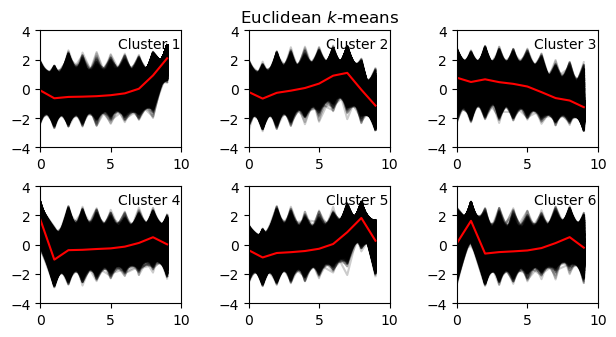

In [13]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train = SFH_lev
#X_train = X_train[y_train < 4]  # Keep first 3 classes
#numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=6, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(6):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")


plt.tight_layout()
plt.show()

In [ ]:
# save dataset
features.to_pickle("features.df")
labels.to_pickle("labels.df")

In [8]:
# load dataset
features = pd.read_pickle("features.df")
labels = pd.read_pickle("labels.df")

In [9]:
labels

0        0
1        1
2        5
3        4
4        0
        ..
91365    1
91366    4
91367    0
91368    4
91369    0
Name: cluster, Length: 91370, dtype: int64

In [14]:
df_cluster = pd.DataFrame()

In [15]:
df_cluster['ID'] = df['id_L19'].astype(int)
df_cluster['cluster'] = y_pred

df_cluster.head()

,ID,cluster
0,1,0
1,2,1
2,3,5
3,4,4
4,5,0


In [16]:
#df_cluster.to_csv('df_cluster_euclidean_3_lev11.txt')

In [17]:
data=Table.read('/gpfswork/rech/owt/commun/galaxy_classification/2023-sfh-galaxy-classification/data/Horizon_AGN-COSMOS_like/HorizonAGN_COSMOS-Web_v2.0_witherr.fits')
df_photometry=data.to_pandas()

In [18]:
pd.set_option('display.max_columns', None)

df_photometry = df_photometry.merge(df_cluster, on= 'ID')
df_photometry.head()

,ID,HSTF814W_FLUX_noerr,HSTF814W_FLUX,HSTF814W_FLUXERR,HSTF814W_MAG_noerr,HSTF814W_MAG,HSTF814W_MAGERR,F444W_FLUX_noerr,F444W_FLUX,F444W_FLUXERR,F444W_MAG_noerr,F444W_MAG,F444W_MAGERR,F115W_FLUX_noerr,F115W_FLUX,F115W_FLUXERR,F115W_MAG_noerr,F115W_MAG,F115W_MAGERR,F150W_FLUX_noerr,F150W_FLUX,F150W_FLUXERR,F150W_MAG_noerr,F150W_MAG,F150W_MAGERR,F277W_FLUX_noerr,F277W_FLUX,F277W_FLUXERR,F277W_MAG_noerr,F277W_MAG,F277W_MAGERR,F770W_FLUX_noerr,F770W_FLUX,F770W_FLUXERR,F770W_MAG_noerr,F770W_MAG,F770W_MAGERR,u_FLUX_noerr,u_FLUX,u_FLUXERR,u_MAG_noerr,u_MAG,u_MAGERR,gHSC_FLUX_noerr,gHSC_FLUX,gHSC_FLUXERR,gHSC_MAG_noerr,gHSC_MAG,gHSC_MAGERR,rHSC_FLUX_noerr,rHSC_FLUX,rHSC_FLUXERR,rHSC_MAG_noerr,rHSC_MAG,rHSC_MAGERR,iHSC_FLUX_noerr,iHSC_FLUX,iHSC_FLUXERR,iHSC_MAG_noerr,iHSC_MAG,iHSC_MAGERR,zHSC_FLUX_noerr,zHSC_FLUX,zHSC_FLUXERR,zHSC_MAG_noerr,zHSC_MAG,zHSC_MAGERR,yHSC_FLUX_noerr,yHSC_FLUX,yHSC_FLUXERR,yHSC_MAG_noerr,yHSC_MAG,yHSC_MAGERR,Y_FLUX_noerr,Y_FLUX,Y_FLUXERR,Y_MAG_noerr,Y_MAG,Y_MAGERR,Ks_FLUX_noerr,Ks_FLUX,Ks_FLUXERR,Ks_MAG_noerr,Ks_MAG,Ks_MAGERR,H_FLUX_noerr,H_FLUX,H_FLUXERR,H_MAG_noerr,H_MAG,H_MAGERR,J_FLUX_noerr,J_FLUX,J_FLUXERR,J_MAG_noerr,J_MAG,J_MAGERR,IB427_FLUX_noerr,IB427_FLUX,IB427_FLUXERR,IB427_MAG_noerr,IB427_MAG,IB427_MAGERR,IB467_FLUX_noerr,IB467_FLUX,IB467_FLUXERR,IB467_MAG_noerr,IB467_MAG,IB467_MAGERR,IB484_FLUX_noerr,IB484_FLUX,IB484_FLUXERR,IB484_MAG_noerr,IB484_MAG,IB484_MAGERR,IB505_FLUX_noerr,IB505_FLUX,IB505_FLUXERR,IB505_MAG_noerr,IB505_MAG,IB505_MAGERR,IB527_FLUX_noerr,IB527_FLUX,IB527_FLUXERR,IB527_MAG_noerr,IB527_MAG,IB527_MAGERR,IB574_FLUX_noerr,IB574_FLUX,IB574_FLUXERR,IB574_MAG_noerr,IB574_MAG,IB574_MAGERR,IB624_FLUX_noerr,IB624_FLUX,IB624_FLUXERR,IB624_MAG_noerr,IB624_MAG,IB624_MAGERR,IB679_FLUX_noerr,IB679_FLUX,IB679_FLUXERR,IB679_MAG_noerr,IB679_MAG,IB679_MAGERR,IB709_FLUX_noerr,IB709_FLUX,IB709_FLUXERR,IB709_MAG_noerr,IB709_MAG,IB709_MAGERR,IB738_FLUX_noerr,IB738_FLUX,IB738_FLUXERR,IB738_MAG_noerr,IB738_MAG,IB738_MAGERR,IB767_FLUX_noerr,IB767_FLUX,IB767_FLUXERR,IB767_MAG_noerr,IB767_MAG,IB767_MAGERR,IB827_FLUX_noerr,IB827_FLUX,IB827_FLUXERR,IB827_MAG_noerr,IB827_MAG,IB827_MAGERR,NB711_FLUX_noerr,NB711_FLUX,NB711_FLUXERR,NB711_MAG_noerr,NB711_MAG,NB711_MAGERR,NB816_FLUX_noerr,NB816_FLUX,NB816_FLUXERR,NB816_MAG_noerr,NB816_MAG,NB816_MAGERR,B_FLUX_noerr,B_FLUX,B_FLUXERR,B_MAG_noerr,B_MAG,B_MAGERR,V_FLUX_noerr,V_FLUX,V_FLUXERR,V_MAG_noerr,V_MAG,V_MAGERR,r_FLUX_noerr,r_FLUX,r_FLUXERR,r_MAG_noerr,r_MAG,r_MAGERR,ip_FLUX_noerr,ip_FLUX,ip_FLUXERR,ip_MAG_noerr,ip_MAG,ip_MAGERR,zpp_FLUX_noerr,zpp_FLUX,zpp_FLUXERR,zpp_MAG_noerr,zpp_MAG,zpp_MAGERR,ch1_FLUX_noerr,ch1_FLUX,ch1_FLUXERR,ch1_MAG_noerr,ch1_MAG,ch1_MAGERR,ch2_FLUX_noerr,ch2_FLUX,ch2_FLUXERR,ch2_MAG_noerr,ch2_MAG,ch2_MAGERR,NUV_FLUX_noerr,NUV_FLUX,NUV_FLUXERR,NUV_MAG_noerr,NUV_MAG,NUV_MAGERR,FUV_FLUX_noerr,FUV_FLUX,FUV_FLUXERR,FUV_MAG_noerr,FUV_MAG,FUV_MAGERR,cluster
0,1,0.629078,0.636226,0.013549,24.403238,24.390972,0.023128,4.343880,4.334220,0.021323,22.305305,22.307723,0.005343,2.434124,2.427549,0.016763,22.934143,22.937080,0.007499,3.259036,3.257389,0.019149,22.617277,22.617826,0.006384,5.136729,5.135544,0.022891,22.123283,22.123534,0.004841,1.991247,2.057662,0.121936,23.152187,23.116565,0.064356,0.284884,0.286727,0.013853,25.263329,25.256330,0.052468,0.314802,0.320382,0.012715,25.154905,25.135828,0.043099,0.498854,0.500087,0.011542,24.655066,24.652387,0.025065,0.962943,0.960387,0.013483,23.940998,23.943884,0.015247,1.650744,1.640276,0.027827,23.355801,23.362707,0.018424,1.961151,1.948152,0.030966,23.168722,23.175943,0.017262,2.029479,1.964291,0.064325,23.131538,23.166985,0.035563,4.630707,4.498899,0.138177,22.235882,22.267234,0.033355,3.615213,3.582190,0.144569,22.504665,22.514629,0.043829,2.695403,2.662646,0.105893,22.823441,22.836716,0.043190,0.285221,0.254946,0.020746,25.262047,25.383880,0.088370,0.284288,0.196832,0.076527,25.265604,25.664760,0.422231,0.303421,0.312712,0.030961,25.194885,25.162140,0.107524,0.324252,0.257366,0.059349,25.122793,

In [19]:
print(*df_photometry.columns)

ID HSTF814W_FLUX_noerr HSTF814W_FLUX HSTF814W_FLUXERR HSTF814W_MAG_noerr HSTF814W_MAG HSTF814W_MAGERR F444W_FLUX_noerr F444W_FLUX F444W_FLUXERR F444W_MAG_noerr F444W_MAG F444W_MAGERR F115W_FLUX_noerr F115W_FLUX F115W_FLUXERR F115W_MAG_noerr F115W_MAG F115W_MAGERR F150W_FLUX_noerr F150W_FLUX F150W_FLUXERR F150W_MAG_noerr F150W_MAG F150W_MAGERR F277W_FLUX_noerr F277W_FLUX F277W_FLUXERR F277W_MAG_noerr F277W_MAG F277W_MAGERR F770W_FLUX_noerr F770W_FLUX F770W_FLUXERR F770W_MAG_noerr F770W_MAG F770W_MAGERR u_FLUX_noerr u_FLUX u_FLUXERR u_MAG_noerr u_MAG u_MAGERR gHSC_FLUX_noerr gHSC_FLUX gHSC_FLUXERR gHSC_MAG_noerr gHSC_MAG gHSC_MAGERR rHSC_FLUX_noerr rHSC_FLUX rHSC_FLUXERR rHSC_MAG_noerr rHSC_MAG rHSC_MAGERR iHSC_FLUX_noerr iHSC_FLUX iHSC_FLUXERR iHSC_MAG_noerr iHSC_MAG iHSC_MAGERR zHSC_FLUX_noerr zHSC_FLUX zHSC_FLUXERR zHSC_MAG_noerr zHSC_MAG zHSC_MAGERR yHSC_FLUX_noerr yHSC_FLUX yHSC_FLUXERR yHSC_MAG_noerr yHSC_MAG yHSC_MAGERR Y_FLUX_noerr Y_FLUX Y_FLUXERR Y_MAG_noerr Y_MAG Y_MAGERR Ks_F

In [20]:
df_magnitude = df_photometry[['ID','u_MAG', 'gHSC_MAG','rHSC_MAG', 'iHSC_MAG','zHSC_MAG','cluster']]
df_flux = df_photometry[['ID','u_FLUX', 'gHSC_FLUX','rHSC_FLUX','iHSC_FLUX','zHSC_FLUX', 'cluster']]

In [21]:
df_magnitude.head()

,ID,u_MAG,gHSC_MAG,rHSC_MAG,iHSC_MAG,zHSC_MAG,cluster
0,1,25.256330,25.135828,24.652387,23.943884,23.362707,0
1,2,25.608875,25.433839,24.989253,24.285662,23.761995,1
2,3,25.836970,25.975482,25.925041,25.193421,24.759748,5
3,4,24.996950,24.935638,24.477681,23.782817,23.229884,4
4,5,27.699570,27.261439,26.956020,26.073994,25.487756,0


In [95]:
df_flux.head()

,ID,u_FLUX,gHSC_FLUX,rHSC_FLUX,iHSC_FLUX,zHSC_FLUX,cluster
0,1,0.286727,0.320382,0.500087,0.960387,1.640276,0
1,2,0.207229,0.243481,0.366690,0.701027,1.135539,1
2,3,0.167962,0.147845,0.154876,0.303831,0.453003,5
3,4,0.364099,0.385252,0.587391,1.113969,1.853730,4
4,5,0.030211,0.045230,0.059923,0.135021,0.231685,0


In [23]:
df_magnitude_noerr = df_photometry[['ID','u_MAG_noerr', 'gHSC_MAG_noerr','rHSC_MAG_noerr','iHSC_MAG_noerr','zHSC_MAG_noerr','cluster']]
df_flux_noerr = df_photometry[['ID','u_FLUX_noerr','gHSC_FLUX_noerr','rHSC_FLUX_noerr','iHSC_FLUX_noerr','zHSC_FLUX_noerr', 'cluster']]

In [24]:
df_magnitude_noerr.head()

,ID,u_MAG_noerr,gHSC_MAG_noerr,rHSC_MAG_noerr,iHSC_MAG_noerr,zHSC_MAG_noerr,cluster
0,1,25.263329,25.154905,24.655066,23.940998,23.355801,0
1,2,25.552471,25.459475,24.998421,24.279184,23.759457,1
2,3,25.911186,25.935917,25.780342,25.227812,24.785313,5
3,4,25.002691,24.921156,24.494930,23.786884,23.223497,4
4,5,27.342621,27.245632,26.783840,25.999836,25.416460,0


In [25]:
df_flux_noerr.head()

,ID,u_FLUX_noerr,gHSC_FLUX_noerr,rHSC_FLUX_noerr,iHSC_FLUX_noerr,zHSC_FLUX_noerr,cluster
0,1,0.284884,0.314802,0.498854,0.962943,1.650744,0
1,2,0.218279,0.237799,0.363607,0.705223,1.138197,1
2,3,0.156865,0.153332,0.176955,0.294358,0.442461,5
3,4,0.362179,0.390425,0.578133,1.109804,1.864666,4
4,5,0.041971,0.045893,0.070221,0.144566,0.247409,0


In [26]:
for i in df_magnitude.columns[1:-1]:
	print("Mean Value of "+i+":\t"+str(df_magnitude[i].mean()))

print('\n')
for i in df_magnitude_noerr.columns[1:-1]:
	print("Mean Value of "+i+":\t"+str(df_magnitude_noerr[i].mean()))
print('\n')

for i in df_flux.columns[1:-1]:
	print("Mean Value of "+i+":\t"+str(df_flux[i].mean()))
print('\n')

for i in df_flux_noerr.columns[1:-1]:
	print("Mean Value of "+i+":\t"+str(df_flux_noerr[i].mean()))

Mean Value of u_MAG:	25.430429787791546
Mean Value of gHSC_MAG:	25.126303420810267
Mean Value of rHSC_MAG:	24.428529412427118
Mean Value of iHSC_MAG:	23.610042310773682
Mean Value of zHSC_MAG:	23.274081265255848


Mean Value of u_MAG_noerr:	25.466856219364853
Mean Value of gHSC_MAG_noerr:	25.125697952450867
Mean Value of rHSC_MAG_noerr:	24.427725916429644
Mean Value of iHSC_MAG_noerr:	23.609862993613394
Mean Value of zHSC_MAG_noerr:	23.273797592350125


Mean Value of u_FLUX:	0.41460028820352873
Mean Value of gHSC_FLUX:	0.5853064904936105
Mean Value of rHSC_FLUX:	1.2088974189475858
Mean Value of iHSC_FLUX:	2.559505877842634
Mean Value of zHSC_FLUX:	3.4443551895475655


Mean Value of u_FLUX_noerr:	0.4146539496213487
Mean Value of gHSC_FLUX_noerr:	0.5853117492026111
Mean Value of rHSC_FLUX_noerr:	1.2088721451687339
Mean Value of iHSC_FLUX_noerr:	2.559460775065834
Mean Value of zHSC_FLUX_noerr:	3.4443515475701143


In [27]:
#Verify number of nan values per column
for i in df_flux.columns:
    print(df_flux[i].isnull().sum())

0
0
0
0
0
0
0


In [28]:
#Verify number of nan values per column
for i in df_flux_noerr.columns:
    print(df_flux_noerr[i].isnull().sum())

0
0
0
0
0
0
0


In [29]:
#Verify number of nan values per column
for i in df_magnitude.columns:
    print(df_magnitude[i].isnull().sum())

0
1039
43
0
0
0
0


In [30]:
#Verify number of nan values per column
for i in df_magnitude_noerr.columns:
    print(df_magnitude_noerr[i].isnull().sum())

0
0
0
0
0
0
0


In [31]:
features  = df_flux[["u_FLUX","gHSC_FLUX","rHSC_FLUX","iHSC_FLUX","zHSC_FLUX"]]

In [32]:
labels = df_flux["cluster"]

In [2]:
# load dataset
features = pd.read_pickle("features.df")
labels = pd.read_pickle("labels.df")

In [3]:
from sklearn.preprocessing import label_binarize

target = label_binarize(labels,classes=[0,1,2,3,4,5])

In [14]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split # Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42,stratify=labels)
train_features, val_features, train_labels, val_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [15]:
train_features.values[0]

array([0.12114715, 0.22183395, 0.50276307, 0.79558565, 1.02187863])

In [16]:
test_features.values[0]

array([0.38330679, 0.5292668 , 1.16116631, 1.74581801, 2.13594759])

In [17]:
val_features.values[0]

array([0.08291449, 0.15124344, 0.31805562, 0.59895174, 0.7116919 ])

In [18]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
# in training sample
scaler = StandardScaler()
# ".values[:]" to keep dataframe and not convert to numpy array
train_features.values[:] = scaler.fit_transform(train_features)

val_features.values[:] = scaler.transform(val_features)
test_features.values[:] = scaler.transform(test_features)

In [53]:
pwd

'/gpfsdswork/projects/rech/jbq/uhf67av'

In [20]:
mlflow.set_tracking_uri("file:/gpfsscratch/rech/owt/commun/galaxy_classification/mlruns")
mlflow.set_experiment("classifier")

<Experiment: artifact_location='file:///gpfsscratch/rech/owt/commun/galaxy_classification/mlruns/192005154444247140', creation_time=1688651319481, experiment_id='192005154444247140', last_update_time=1688651319481, lifecycle_stage='active', name='classifier', tags={}>

In [24]:
mlflow.start_run(run_name="RFC")
mlflow.autolog()
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=10)

2023/07/06 18:42:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [25]:
classifier.fit(train_features,train_labels)

2023/07/06 18:43:11 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/rapids-23.04/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


RandomForestClassifier(max_depth=10)

In [26]:
prediction_test = classifier.predict_proba(test_features)

In [27]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(train_labels)
y_onehot_test = label_binarizer.transform(test_labels)
y_onehot_test.shape  # (n_samples, n_classes)

class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

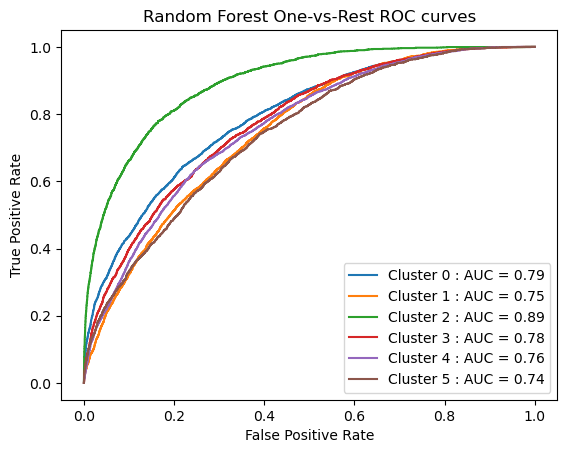

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay,roc_curve,roc_auc_score

fig, ax = plt.subplots()
#plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Random Forest One-vs-Rest ROC curves")

for i in np.unique(labels):
    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

    fpr_model, tpr_model, _ = roc_curve(y_onehot_test[:, class_id], prediction_test[:, class_id])
    roc_display_model = RocCurveDisplay(fpr=fpr_model, tpr=tpr_model)
    auc = roc_auc_score(y_onehot_test[:, class_id], prediction_test[:, class_id])
    
    roc_display_model.plot(ax=ax, name=f'Cluster {i} : AUC = {round(auc,2)}')

plt.savefig("./ROC_curves.png")
mlflow.log_artifact("ROC_curves.png")
plt.show()
mlflow.end_run()
#plt.savefig("./ROC_curves.png")

In [29]:
mlflow.start_run(run_name="Adaboost")
mlflow.autolog()
from sklearn.ensemble import AdaBoostClassifier

2023/07/06 18:43:12 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [30]:
adaboost_classifier =  AdaBoostClassifier()

In [31]:
adaboost_classifier.fit(train_features,train_labels)

/gpfslocalsup/pub/anaconda-py3/2021.05/envs/rapids-23.04/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoostClassifier()

In [32]:
prediction_test_adaboost = adaboost_classifier.predict_proba(test_features)

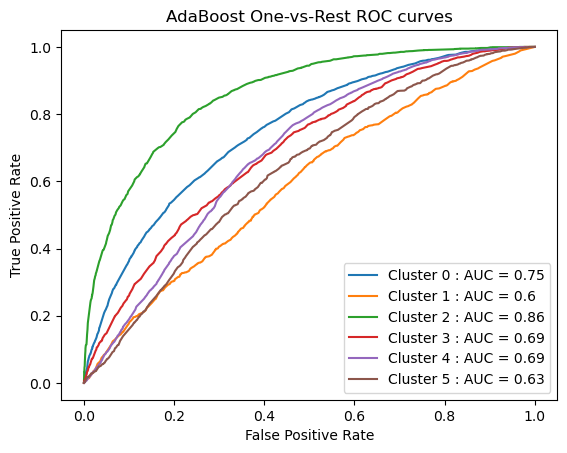

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay,roc_curve,roc_auc_score

fig, ax = plt.subplots()
#plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"AdaBoost One-vs-Rest ROC curves")

for i in np.unique(labels):
    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

    fpr_model, tpr_model, _ = roc_curve(y_onehot_test[:, class_id], prediction_test_adaboost[:, class_id])
    roc_display_model = RocCurveDisplay(fpr=fpr_model, tpr=tpr_model)
    auc = roc_auc_score(y_onehot_test[:, class_id], prediction_test_adaboost[:, class_id])
    
    roc_display_model.plot(ax=ax, name=f'Cluster {i} : AUC = {round(auc,2)}')
    
plt.savefig("./ROC_curves_AdaBoost.png")
mlflow.log_artifact("ROC_curves_AdaBoost.png")
plt.show()
mlflow.end_run()

In [94]:
mlflow.start_run(run_name="MLP")
mlflow.autolog()

ModuleNotFoundError: No module named 'torch'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay,roc_curve,roc_auc_score

fig, ax = plt.subplots()
#plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"AdaBoost One-vs-Rest ROC curves")

for i in np.unique(labels):
    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

    fpr_model, tpr_model, _ = roc_curve(y_onehot_test[:, class_id], prediction_test_adaboost[:, class_id])
    roc_display_model = RocCurveDisplay(fpr=fpr_model, tpr=tpr_model)
    auc = roc_auc_score(y_onehot_test[:, class_id], prediction_test_adaboost[:, class_id])
    
    roc_display_model.plot(ax=ax, name=f'Cluster {i} : AUC = {round(auc,2)}')
    
plt.savefig("./ROC_curves_MLP.png")
mlflow.log_artifact("ROC_curves_MLP.png")
plt.show()
mlflow.end_run()

In [34]:
mlflow.start_run(run_name="SVM_RBF")
mlflow.autolog()
from sklearn.svm import SVC

2023/07/06 18:44:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [36]:
svm_rbf = SVC()

In [ ]:
svm_rbf.fit(train_features,train_labels)

In [ ]:
prediction_test_svm_rbf = svm_rbf.predict_proba(test_features)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay,roc_curve,roc_auc_score

fig, ax = plt.subplots()
#plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"AdaBoost One-vs-Rest ROC curves")

for i in np.unique(labels):
    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

    fpr_model, tpr_model, _ = roc_curve(y_onehot_test[:, class_id], prediction_test_svm_rbf[:, class_id])
    roc_display_model = RocCurveDisplay(fpr=fpr_model, tpr=tpr_model)
    auc = roc_auc_score(y_onehot_test[:, class_id], prediction_test_svm_rbf[:, class_id])
    
    roc_display_model.plot(ax=ax, name=f'Cluster {i} : AUC = {round(auc,2)}')
    
plt.savefig("./ROC_curves_SVM_RBF.png")
mlflow.log_artifact("ROC_curves_SVM_RBF.png")
plt.show()
mlflow.end_run()

In [ ]:
def roc_auc():
    

In [ ]:
names = [
    "Random Forest",
    "AdaBoost"
]

classifiers = [
    RandomForestClassifier(n_estimators=100, max_depth=10),
    AdaBoostClassifier()
]

In [37]:
from cuml.svm import SVC
from cuml.ensemble import RandomForestClassifier as RFC
from cuml.preprocessing import train_test_split, label_binarize,StandardScaler
from cuml.multiclass import OneVsRestClassifier
import cudf
from cuml.preprocessing import LabelBinarizer

# load dataset
features = pd.read_pickle("features.df")
labels = pd.read_pickle("labels.df")

# Load your dataset
features = cudf.DataFrame(features)  # Input features for training
labels = cudf.Series(labels)     # Target labels for training

In [38]:
labels

0        0
1        1
2        5
3        4
4        0
        ..
91365    1
91366    4
91367    0
91368    4
91369    0
Name: cluster, Length: 91370, dtype: int64

In [39]:

import cudf
from cuml.preprocessing import LabelEncoder
from cuml.preprocessing import OneHotEncoder

classifier=[SVC(kernel='linear'),SVC(kernel='rbf'),RFC(n_estimators=100, max_depth=10),RFC(n_estimators=100, max_depth=15)]
name = ['SVM_linear','SVM_rbf','RandomForest_100estim_10maxdepth','RandomForest_100estim_15maxdepth']


# Assuming your list object is called 'labels_list'
labels = cudf.DataFrame({'labels': labels})

In [40]:
labels

,labels
0,0
1,1
2,5
3,4
4,0
...,...
91365,1
91366,4
91367,0
91368,4


In [41]:
# Assuming your labels are stored in a cuDF DataFrame called 'labels_df'
labels = labels['labels']

# Apply label encoding
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert encoded labels to a cuDF DataFrame
labels = cudf.DataFrame({'encoded_labels': labels})

# Apply one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
target = onehot_encoder.fit_transform(labels)

In [48]:
target = cudf.Series(target)     # Target labels for training

91370.0

In [47]:
type(features)

cudf.core.dataframe.DataFrame

In [51]:
#target = label_binarize(labels,classes=[0,1,2,3,4,5])
from cuml.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, target, stratify=target, test_size = 0.2, random_state = 42)
train_features, val_features, train_labels, val_labels = train_test_split(features, target, test_size = 0.2, random_state = 42)

# Standardize features by removing the mean and scaling to unit variance
# in training sample
scaler = StandardScaler()
# ".values[:]" to keep dataframe and not convert to numpy array
train_features.values[:] = scaler.fit_transform(train_features)

val_features.values[:] = scaler.transform(val_features)
test_features.values[:] = scaler.transform(test_features)

ValueError: X and y must have the same first dimension(found 91370 and 548220)

In [ ]:
for classifier,name in zip(classifier,name):
    mlflow.start_run(run_name=f"{name}")
    mlflow.autolog()

    classifier = OnevsRestClassifier(classifier)
    y_score= classifier.fit(train_features,train_labels).decision_function(test_features)

    fpr = dict()
    tpr =dict()

    for i in range(6):
        fpr[i],tpr[i] = roc_curve(test_labels[:,i],y_score[:,i])
        roc_auc[i] = auc(fpr[i],tpr[i])

    for i in rage(6):
        plt.figure()
        plt.plot(pfr[i],tpr[i],label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title(f'ROC curve {name}')
        plt.legend(loc='lower right')

    mlflow.log_artifact(f"ROC_{name}.png")
    plt.show()
            
    mlflow.end_run()
    print(f"{classifier} OK")

In [17]:
mlflow.end_run()